# 로지스틱 회귀

### 다중 분류 문제
- 회귀 기법을 분류 문제에 적용 그 중 하나의 알고리즘이 로지스틱 회귀이다.

## 사이킷런을 이용한 붓꽃(iris) 데이터 분류

- 붓꽃 데이터 세트를 사용해서
- 붓꽃의 품종을 분류(Classification)

### 붓꽃 데이터 세트
- sklearn.datasets에 들어 있음
- load_iris()를 통해 로드해서 사용
- 머신러닝 각 분야에서 알고리즘을 측정하기 위한 기본 자료로 다양하게 활용
- 4가지 속성(피처)을 가진 3가지 붓꽃 품종의 50개 샘플 포함

**3가지 붓꽃 품종**
- Setosa
- Versicolor
- Virginica

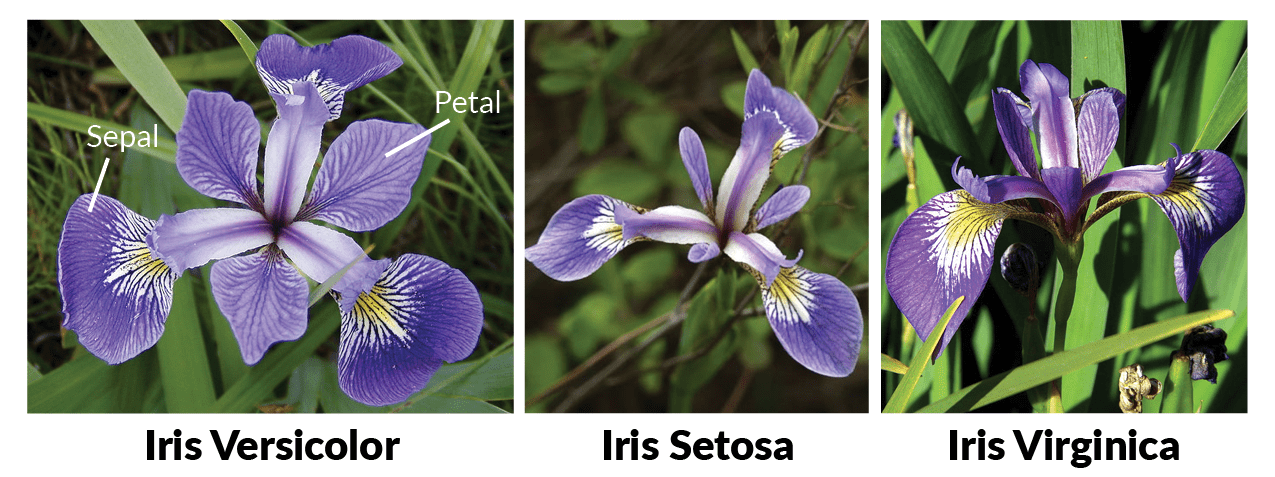
http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html

### 붓꽃의 4가지 속성(피처 (Feature))
- 꽃받침 길이 : Sepal Length
- 꽃받침 너비 : Sepal Width
- 꽃잎의 길이 : Petal Length
- 꽃잎의 너비 : Petal Width

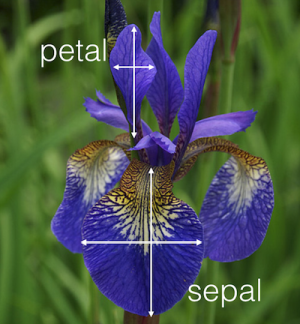

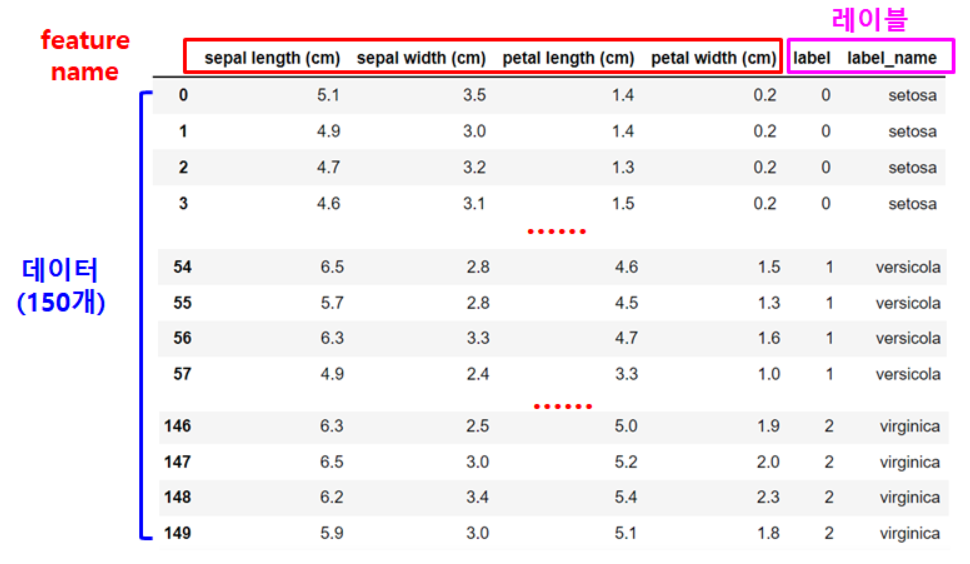

### 데이터 준비하기
- iris data 이용

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
# 붓꽃 데이터 세트 로딩
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
# iris.data : Iris 데이터 세트에서 
# 피처(feature)만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data
print(iris_data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [4]:
iris_label = iris.target
print(iris_label)
print(iris.target_names)
print(iris.feature_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris_df.shape

(150, 5)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.3, random_state=11)

In [8]:
X_train[:10]

array([[5.1, 2.5, 3. , 1.1],
       [6.6, 2.9, 4.6, 1.3],
       [5. , 3.2, 1.2, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [5.1, 3.8, 1.6, 0.2],
       [6.8, 3.2, 5.9, 2.3],
       [6.9, 3.1, 5.1, 2.3],
       [5.9, 3. , 4.2, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.7, 3.1, 4.7, 1.5]])

### k-최근접 이웃 분류기를 이용한 분류 확률 예측
- 확률은 회귀?? 분류??
- 첫번째 결정
    - k-최근접 이웃을 활용해 찾아진 주변 이웃 클래스들의 비율을 확률로 출력

In [9]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(X_train, y_train)

print(kn.score(X_train, y_train))
print(kn.score(X_test, y_test))

0.9714285714285714
0.9555555555555556


In [10]:
# 분류 결정값 확인
print(kn.classes_)

[0 1 2]


In [11]:
# 테스트 데이터 앞 5개 데이터에 대한 분류 결과
kn.predict(X_test[:5])

array([2, 2, 2, 1, 2])

In [12]:
import numpy as np
pred_proba = kn.predict_proba(X_test[:5])
np.round(pred_proba, 3)
# 주변의 이웃들만 가지고 확률을 판단하기 때문에 나타날 수 있는 확률이 정해질 수 밖에 없다.
# 확률에 따라서 분류하고 이를 계산한 비율을 넘겨줄 뿐이다.

array([[0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.333, 0.667],
       [0.   , 0.667, 0.333],
       [0.   , 0.   , 1.   ]])

### 3개의 품종중 하나로 결정된 이유
- 3개 각 품종으로 으로 분류될 확률을 먼저 계산하고 거기서 가장 확률값이 높은 품종으로 분류됨
    - 즉, 2로 분류되었다고 해서 100프로 2번 품종 이라는 의미는 아님
        - 2번 품종일 확률이 가장 높다는 의미를 갖는다
- sklearn은 각 분류 클래스의 예측 확률을 반환하는 함수인
    -  predict_proba()함수를 제공한다

 - [0.     0.3333 0.6667]
     - [첫번째 품종에 대한 확률, 두번째 품종에 대한 확률, 세번째 품종에 대한 확률]

In [13]:
# 각 테스트 샘플에 대하여 최근접 이웃 결정값을 확인하면
import numpy as np
pred_proba = kn.predict_proba(X_test[2:3])
np.round(pred_proba, 3)

array([[0.   , 0.333, 0.667]])

In [14]:
# 각 테스트 샘플에 대하여 최근접 이웃 결정값(neighbors 활용)을 확인하면
dist, idx = kn.kneighbors(X_test[2:3])
print(dist, idx)
print(y_train[idx])

[[0.36055513 0.37416574 0.43588989]] [[48 24 64]]
[[1 2 2]]


- 3개의 최근접 이웃을 사용하기 때문에 가능한 확률은
    - 0/3, 1/3, 2/3, 3/3 이 전부임
    - 확률이라고 이야기 하기에는 많이 부족함

## 로지스틱 회귀
- 회귀식을 사용한 분류모델
   - 선형회귀와 동일하게 선형회귀식을 학습
       - z = a X 꽃잎길이 + b X 꽃잎 넓이 + c X 꽃받침 길이 + d X 꽃받침 넓이 + e
       - 다른 값으로 변환된다. 가중치와 절편의 값으로 이루어져 있는 z 값으로 변환
  
   - z는 어떤 값도 가능

       - 단, 분류가 되려면 0 에서 1 (or 0 에서 100%) 사이 값이 되어야 함 -> 확률로 분류를 진행하기 때문이다.

   - z가 아주 큰 음수일때는 0, z가 아주 큰 양수일때는 1로 바꾸는 방법은?
        
       - 시그모이드함수를 사용
         - 1/(1+e**-z)
         - z 값이 커지면 커질수록 1에 가까워진다.
         
       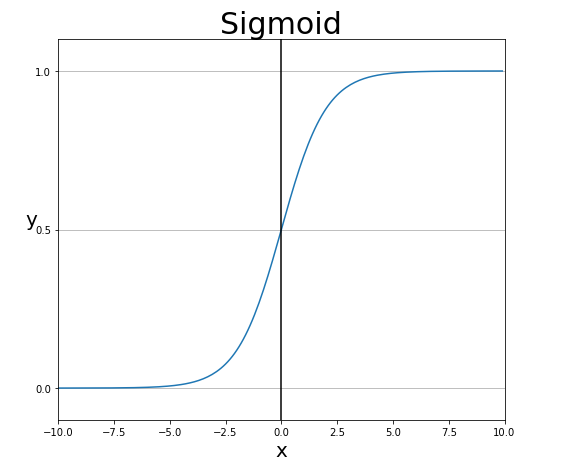

       - 선형 방정식의 출력 z의 음수를 사용해 자연상수 e를 거듭제곱하고 1을 더한 값의 역수를 취함
           - 이 계산식을 이용하면 위와 같은 그래프를 그릴 수 있음

In [15]:
# 시그모이드 함수 계산
import numpy as np
import matplotlib.pyplot as plt
# -5에서 +4.9까지 0.1간격의 난수 생성
# z값이 -5에서 +5 사이라면
# z값은 주어진 데이터에 대해서 선형회귀 알고리즘이 찾아낸 식을 적용한 결과값이다.

z = np.arange(-5, 5, 0.1)
z 

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [16]:
# z에 대하여 시그모이드 연산을 진행한 phi를 생성 후 그래프로 확인
phi = 1/(1 + np.exp(-z))
phi

array([0.00669285, 0.00739154, 0.00816257, 0.0090133 , 0.0099518 ,
       0.01098694, 0.01212843, 0.01338692, 0.01477403, 0.0163025 ,
       0.01798621, 0.01984031, 0.02188127, 0.02412702, 0.02659699,
       0.02931223, 0.03229546, 0.03557119, 0.03916572, 0.04310725,
       0.04742587, 0.05215356, 0.05732418, 0.06297336, 0.06913842,
       0.07585818, 0.0831727 , 0.09112296, 0.09975049, 0.10909682,
       0.11920292, 0.13010847, 0.14185106, 0.15446527, 0.16798161,
       0.18242552, 0.19781611, 0.21416502, 0.23147522, 0.24973989,
       0.26894142, 0.2890505 , 0.31002552, 0.33181223, 0.35434369,
       0.37754067, 0.40131234, 0.42555748, 0.450166  , 0.47502081,
       0.5       , 0.52497919, 0.549834  , 0.57444252, 0.59868766,
       0.62245933, 0.64565631, 0.66818777, 0.68997448, 0.7109495 ,
       0.73105858, 0.75026011, 0.76852478, 0.78583498, 0.80218389,
       0.81757448, 0.83201839, 0.84553473, 0.85814894, 0.86989153,
       0.88079708, 0.89090318, 0.90024951, 0.90887704, 0.91682

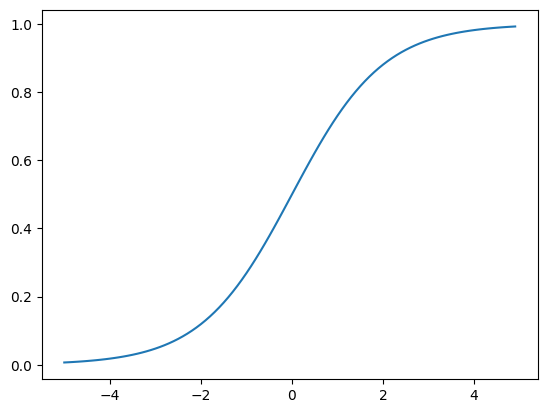

In [17]:
plt.plot(z, phi)

In [18]:
# z값이 무한대로 커지면
# 무한대 표현은 불가능하므로 +- 5보다 상당히 커지면
z = np.arange(-100000, 100000, 0.1)

C:\Users\이상민\AppData\Local\Temp\ipykernel_24636\1940062470.py:1: RuntimeWarning: overflow encountered in exp
  phi = 1/(1 + np.exp(-z))


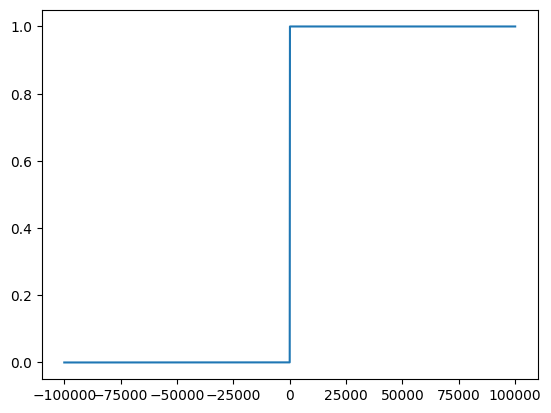

In [19]:
phi = 1/(1 + np.exp(-z))
# 값이 많아서 overflow 가 발생했다는 의미이다.
plt.plot(z, phi)

- 값이 음수/양수로 커질수록 0과 1에 완전 수렴

### 로지스틱 회귀로 이진 분류 수행하기

In [20]:
# 불리언 인덱싱
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [21]:
# 2개의 품종만 추출
two_indexes = (y_train == 0)|(y_train == 1) 
two_indexes
X_train_two = X_train[two_indexes]
y_train_two = y_train[two_indexes]

In [22]:
set(y_train_two)

{0, 1}

In [23]:
#이진 분류(0/1)
from sklearn.linear_model import LogisticRegression
lr_cfg = LogisticRegression()
lr_cfg.fit(X_train_two, y_train_two)

LogisticRegression()

In [24]:
# 모델 파라미터 확인
lr_cfg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### 로지스틱 회귀 모델 생성 함수  
- LogisticRegression(penalty, dual, tol, C, fit_intercept,  
                   intercept_scaling, class_weight, random_state, 
                   solver, max_iter, multi_class, verbose, warm_start, n_jobs, l1_ratio)

- penalty : 규제에 사용 된 기준을 지정 (l1, l2, elasticnet, none) – default : l2
- dual : 이중 또는 초기 공식 
- tol : 정밀도
- C : 규제 강도
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- intercept_scaling : 정규화 효과 정도
- class_weight : 클래스의 가중치
- random_state : 난수 seed 설정
- solver : 최적화 문제에 사용하는 알고리즘
- max_iter : 계산에 사용할 작업 수
- multi_class : 다중 분류 시에 (ovr, multinomial, auto)로 설정
- verbose : 동작 과정에 대한 출력 메시지
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수
- l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용)

In [25]:
# 5개의 샘플에 대한 예측
print(lr_cfg.predict(X_train_two[:7]))

[1 1 0 0 1 1 0]


In [26]:
# 5개의 샘플에 대한 예측 확률
print(np.round(lr_cfg.predict_proba(X_train_two[:5]), 4))

[[0.207  0.793 ]
 [0.0053 0.9947]
 [0.9829 0.0171]
 [0.9754 0.0246]
 [0.0151 0.9849]]


- 100% 0번품종, 100% 1번품종으로 나오는 경우는 거의 없음
    - 어떤 모델이든 분류에 대한 확률로 계산하고, 그 확률값이 가장 큰 클래스로 결정함
    - 이진 분류이므로 0.5가 넘어가는 클래스로 결정

In [27]:
# 클래스값을 크기순으로 정렬해서 사용
# 위 predict_proba()결과값은 앞 숫자가 0일 확률, 뒤 숫자가 0일 확률임
# 클래스값이 문자라면 알파벳순으로 정렬 후 확률을 제공 알파벳에 따른 index 를 지정해준다.
print(lr_cfg.classes_)

[0 1]


In [28]:
# 회귀계수와 절편 확인
print(lr_cfg.coef_, lr_cfg.intercept_)

[[ 0.38875002 -0.89288122  2.17302605  0.91050282]] [-5.92772201]


z=(0.38875002*'꽃받침길이'+ -0.89288122*'꽃받침넓이'+ 2.17302605*'꽃잎길이' + 0.91050282*'꽃잎넓이' ) + -5.92772201

- 로지스틱회귀 알고리즘은 회귀식에 의해서 각각에 대하여 최종 회귀식을 적용시킨 z 값을 반환하는 메서드를 가지고 있다.
    - 모델이 찾아낸 회귀식을 함수록 저장하고 았음
    - LogisticRegression.decision_function(data)
        - 회귀식으로 계산된 z 값을 반환 

In [29]:
# 계산된 z값(5개의 샘플에대해)
desc = lr_cfg.decision_function(X_train_two[:5])
desc

array([ 1.34333127,  5.22824605, -4.05146   , -3.67910331,  4.17972306])

- 위 z값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있음
    - scipy 패키지의 expit()가 시그모이드 연산을 진행

In [30]:
from scipy.special import expit

# 1일 확률값이 반환
expit(desc)

array([0.79303723, 0.99466568, 0.01709948, 0.02462396, 0.9849279 ])

결과 모음

[[0.207  0.793 ]
 [0.0053 0.9947]
 [0.9829 0.0171]
 [0.9754 0.0246]
 [0.0151 0.9849]]

[1 1 0 0 1 1 0]

array([ 1.34333127,  5.22824605, -4.05146   , -3.67910331,  4.17972306])

### 로지스틱 회귀로 다중 분류 수행하기
- 회귀알고리즘은 반복 알고리즘을 사용함
    - 반복적으로 계산하여  잔차가 적은 회귀식을 찾아내는 것이 목표임
    - `max_iter`는 반복 횟수(기본값은 100인데 100번 반복이 부족하다는 경고가 뜰 수 있음.) 충분한 반복을 위해 1000번으로 상향조정
        - 하이퍼파라미터기때문에 사이언티스트가 임의 조정한다
    - C는 로지스틱 규제 파라미터
        - 값이 작을 수록 규제가 커짐
        - 기본값은 1

In [31]:
# 규제를 좀 완화하기 위해 C=20, 충분한 반복 학습을 위해 max_iter=1000
lr_cfg = LogisticRegression(C = 20, max_iter =1000)
lr_cfg.fit(X_train, y_train)

LogisticRegression(C=20, max_iter=1000)

In [32]:
print(lr_cfg.score(X_train, y_train))
print(lr_cfg.score(X_test, y_test))

0.9904761904761905
0.9777777777777777


- 훈련세트와 테스트세트에 대한 점수가 높고, 과대적합이나 과소적합으로 치우친것 같지 않음

In [33]:
# 5개 테스트 데이터로 예측
print(lr_cfg.predict(X_test[:5]))

[2 2 2 1 2]


In [34]:
# 예측 확률
pred_proba = lr_cfg.predict_proba(X_test[:5])
np.round(pred_proba, 3)

array([[0.   , 0.004, 0.996],
       [0.   , 0.004, 0.996],
       [0.   , 0.477, 0.523],
       [0.   , 0.898, 0.102],
       [0.   , 0.015, 0.985]])

In [35]:
# 각 열에 대한 클래스 명
print(lr_cfg.classes_)

[0 1 2]


In [36]:
pd.DataFrame(pred_proba, columns = lr_cfg.classes_)

,0,1,2
0,5.046295e-09,0.003979,0.996021
1,2.100967e-08,0.003980,0.996020
2,3.087652e-06,0.476896,0.523101
3,1.162881e-04,0.897671,0.102213
4,3.334366e-08,0.015467,0.984533


In [37]:
# 4 개의 특징을 사용하므로 회귀계수는 4
# 3개의 분류에 대한 확률을 각각 계산해야 하므로 3행의 방정식이 생김
# 즉 z 값을 3개를 계산
lr_coef = lr_cfg.coef_
lr_coef

array([[-0.32430912,  2.29845583, -4.57646974, -2.27305634],
       [ 1.15265121, -0.39086816, -0.52700801, -2.59014242],
       [-0.82834209, -1.90758767,  5.10347775,  4.86319876]])

In [38]:
# 품종 0의 z값을 계산할 방정식 회귀 계수
lr_coef[0]
# 품종 1의 z값을 계산할 방정식 회귀 계수
lr_coef[1]
# 품종 2의 z값을 계산할 방정식 회귀 계수
lr_coef[2]

array([-0.82834209, -1.90758767,  5.10347775,  4.86319876])

In [39]:
# 테스트데이터 0번에 대한 z값
lr_cfg.decision_function(X_test[:1])

array([[-10.89280558,   2.68498625,   8.20781933]])

In [40]:
# 테스트데이터에 4번까지에 대한 값들 도출하기
lr_cfg.decision_function(X_test[:5])

array([[-10.89280558,   2.68498625,   8.20781933],
       [ -9.94204501,   2.20979504,   7.73224997],
       [ -7.99592048,   3.95172293,   4.04419755],
       [ -5.24341031,   3.70807781,   1.53533249],
       [-10.08271346,   2.9646163 ,   7.11809716]])

- 3개의 z값을 0이나 1로 변환해야 함
    - 시그모이드 함수는 2개의 값을 0~1로 변환하므로 사용 불가
    - 다중 값을 0~1로 변환시키는 함수는 softmax 함수임

### softmax
- s1= np.exp(-10.89)/sum([np.exp(-10.89),  np.exp(2.68),  np.exp(8.21)])
- s2= np.exp(2.68)/sum([np.exp(-10.89),  np.exp(2.68),  np.exp(8.21)])
- s3= np.exp(8.21)/sum([np.exp(-10.89),  np.exp(2.68),  np.exp(8.21)])
- s1에서 s3까지 모두 더하면 분자와 분모가 같아지므로 1이됨
    - 모든 품종의 확률의 합은 1이 되어야 하므로 

### 첫번째 샘플의 z값 : [-10.89   2.68   8.21]
- 가장 값이 큰 8.21의 확률 계산

In [41]:
np.exp(8.21)/sum([np.exp(-10.89), np.exp(2.86), np.exp(8.21)])
np.exp(2.68)/sum([np.exp(-10.89), np.exp(2.86), np.exp(8.21)])
np.exp(-10.89)/sum([np.exp(-10.89), np.exp(2.86), np.exp(8.21)])

5.0456622703908475e-09

In [42]:
desc[0]

1.3433312708526843

- scipy의 softmax 함수를 이용하면 쉽게 계산 가능

In [43]:
from scipy.special import softmax
pred_proba = softmax(desc, axis=1)
np.round(pred_proba, 3)

AxisError: axis 1 is out of bounds for array of dimension 1